# 한국거래소(KRX) 전체 종목 분석

# 라이브러리 불러오기

In [2]:
# 데이터 분석을 위해 pandas, 시각화를 위해 seaborn 불러오기
import pandas as pd 
import seaborn as sns

# FinanceDataReader 로 수집한 전체 종목 불러오기

In [5]:
df = pd.read_csv("krx.csv")
df.shape

(8273, 10)

### 일부 데이터만 가져오기

In [6]:
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [7]:
df.tail()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
8268,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
8269,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
8270,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8271,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8272,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


# 데이터 요약하기

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8273 entries, 0 to 8272
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          8273 non-null   object
 1   Market          8273 non-null   object
 2   Name            8273 non-null   object
 3   Sector          2499 non-null   object
 4   Industry        2482 non-null   object
 5   ListingDate     2499 non-null   object
 6   SettleMonth     2499 non-null   object
 7   Representative  2499 non-null   object
 8   HomePage        2347 non-null   object
 9   Region          2499 non-null   object
dtypes: object(10)
memory usage: 646.5+ KB


In [9]:
# describe 기술통계
df.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,8273,8273,8273,2499,2482,2499,2499,2499,2347,2499
unique,8273,3,8273,161,2327,1858,8,2384,2326,22
top,060310,KOSPI,3S,소프트웨어 개발 및 공급업,기업인수합병,1976-06-30,12월,-,http://www.gccorp.com,서울특별시
freq,1,6575,1,151,29,8,2438,4,2,1022


In [11]:
# 중복 제외한 unique 값 개수
df.nunique()

Symbol            8273
Market               3
Name              8273
Sector             161
Industry          2327
ListingDate       1858
SettleMonth          8
Representative    2384
HomePage          2326
Region              22
dtype: int64

In [12]:
# index 값 보기
df.index

RangeIndex(start=0, stop=8273, step=1)

In [13]:
# 컬럼만 보기
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [14]:
# 값만 보기
df.values

array([['060310', 'KOSDAQ', '3S', ..., '김세완', 'http://www.3sref.com',
        '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '박대현, 손삼달',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['419890', 'KOSPI', '히어로즈 단기채권ESG액티브', ..., nan, nan, nan],
       ['429870', 'KOSPI', '히어로즈 리츠이지스액티브', ..., nan, nan, nan],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

# 데이터 색인하기

## series

In [15]:
# name 컬럼 하나만 가져오기
df["Name"]

0                    3S
1                AJ네트웍스
2                 AK홀딩스
3                APS홀딩스
4                 AP시스템
             ...       
8268               흥아해운
8269                 희림
8270    히어로즈 단기채권ESG액티브
8271      히어로즈 리츠이지스액티브
8272                 힘스
Name: Name, Length: 8273, dtype: object

In [16]:
# df["Name"] 의 Type 보기
type(df["Name"])

pandas.core.series.Series

In [18]:
# 0번째 행만 가져오기. 행인덱스를 가져올때는 .loc 사용하기
# loc는 위치(locate)를 의미함
df.loc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                        전자부품 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate                 2002-04-23
SettleMonth                        03월
Representative                     김세완
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [19]:
# df.loc[0] 의 tpye 보기
type(df.loc[0])

pandas.core.series.Series

## dataframe

In [20]:
type(df)

pandas.core.frame.DataFrame

In [23]:
# 여러 컬럼을 지정할 때는 리스트 형태로 묶어줘야 함
# 2차원 행렬은 대괄호가 [] 2개 있음
df[["Symbol","Name"]]

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템
...,...,...
8268,003280,흥아해운
8269,037440,희림
8270,419890,히어로즈 단기채권ESG액티브
8271,429870,히어로즈 리츠이지스액티브


In [24]:
# 여러개 행 가져올때도 [] 통해 리스트 형태로 묶어줌
df.loc[[0,1]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시


In [26]:
# 1개의 컬럼을 가져올때도 대괄호 2개를 써서 리스트 형태로 묶어주면 데이터프레임 형태로 반환됨
type(df[["Name"]])

pandas.core.frame.DataFrame

## loc를 통한 서브셋 가져오기

In [27]:
# 행과 열 함께 가져오기 
# .loc[행, 열]
df.loc[0,"Name"]

'3S'

In [29]:
# 여러 개의 행과 하나의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0,1,2], "Name"]

0        3S
1    AJ네트웍스
2     AK홀딩스
Name: Name, dtype: object

In [30]:
# 여러 개의 행과 여러 개의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0,1,2], ["Symbol","Name"]]

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스


## boolean indexing
* 결과값이 true, false bool 형태로 반환됨
* boolean indexing을 사용해 특정 조건식을 만족하는 데이터 서브셋으로 가져오기

In [32]:
# 카카오 찾기
df[df["Name"]=="카카오"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5877,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,남궁훈,http://www.kakaocorp.com,제주특별자치도


In [41]:
# 서울특별시에 소재지를 두고있는 Kospi 종목의 종목명과 심볼 가져오기
df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"), ["Symbol","Name"]]

,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
53,027410,BGF
54,282330,BGF리테일
57,001460,BYC
...,...,...
8243,081660,휠라홀딩스
8254,079980,휴비스
8257,005010,휴스틸
8265,000540,흥국화재


# 파생변수 만들기

In [44]:
# pd.to_datetime 을 통해 데이터의 타입 변환하기
df["ListingDate"] = pd.to_datetime(df["ListingDate"])

In [46]:
# ListingYear 파생변수 만들기
df["ListingYear"] = df["ListingDate"].dt.year

In [48]:
df["ListingYear"].tail()

8268    1976.0
8269    2000.0
8270       NaN
8271       NaN
8272    2017.0
Name: ListingYear, dtype: float64

In [49]:
df[["ListingDate","ListingYear"]]

,ListingDate,ListingYear
0,2002-04-23,2002.0
1,2015-08-21,2015.0
2,1999-08-11,1999.0
3,2001-12-04,2001.0
4,2017-04-07,2017.0
...,...,...
8268,1976-06-29,1976.0
8269,2000-02-03,2000.0
8270,NaT,NaN
8271,NaT,NaN


# 데이터 시각화를 위한 폰트 설정

<AxesSubplot:title={'center':'한글폰트'}>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


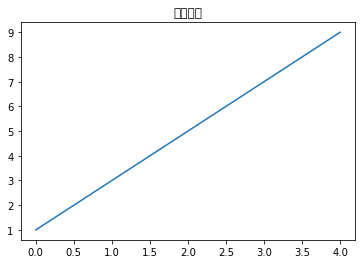

In [52]:
# 한글폰트 확인하기
pd.Series([1,3,5,7,9]).plot(title="한글폰트")

In [57]:
# 폰트 설정
import matplotlib.pyplot as plt
font_family="AppleGothic"
plt.rc("font", family=font_family)

#마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

<AxesSubplot:title={'center':'한글폰트'}>

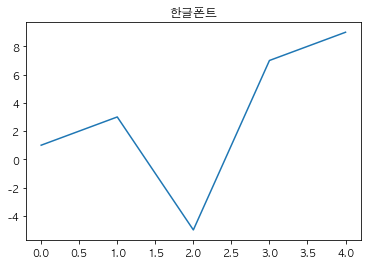

In [58]:
# 한글폰트 확인하기
pd.Series([1,3,-5,7,9]).plot(title="한글폰트")

# 한 개의 변수 빈도수 구하고 시각화하기

## market

In [59]:
# market column에 어떤 데이터들이 있는지 unique로 확인하기
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [60]:
# value_counts()로 빈도수 구하기
df["Market"].value_counts()

KOSPI     6575
KOSDAQ    1573
KONEX      125
Name: Market, dtype: int64

<AxesSubplot:>

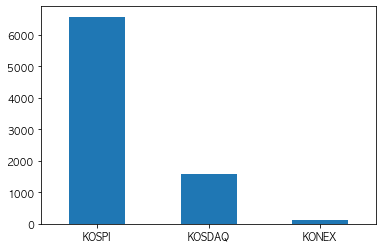

In [63]:
# 빈도수 시각화하기
df["Market"].value_counts().plot.bar(rot=0)

<AxesSubplot:xlabel='Market', ylabel='count'>

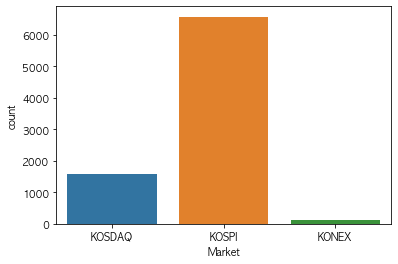

In [64]:
# seaborn으로 빈도수 시각화하기
sns.countplot(data=df, x="Market")

## Sector

In [76]:
sector_count_top = df["Sector"].value_counts().head(30)

In [79]:
sector_count_top.index

Index(['소프트웨어 개발 및 공급업', '특수 목적용 기계 제조업', '전자부품 제조업', '의약품 제조업',
       '자동차 신품 부품 제조업', '기타 금융업', '기타 화학제품 제조업', '금융 지원 서비스업',
       '통신 및 방송 장비 제조업', '반도체 제조업', '자연과학 및 공학 연구개발업', '1차 철강 제조업',
       '의료용 기기 제조업', '플라스틱제품 제조업', '일반 목적용 기계 제조업', '기초 화학물질 제조업',
       '기초 의약물질 및 생물학적 제제 제조업', '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '기타 전문 도매업',
       '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', '기타 식품 제조업',
       '영화, 비디오물, 방송프로그램 제작 및 배급업', '의료용품 및 기타 의약 관련제품 제조업', '봉제의복 제조업',
       '기계장비 및 관련 물품 도매업', '측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외', '건물 건설업',
       '기타 금속 가공제품 제조업', '부동산 임대 및 공급업', '구조용 금속제품, 탱크 및 증기발생기 제조업'],
      dtype='object')

In [82]:
sector_30 = df[df["Sector"].isin(sector_count_top.index)]

<AxesSubplot:xlabel='count', ylabel='Sector'>

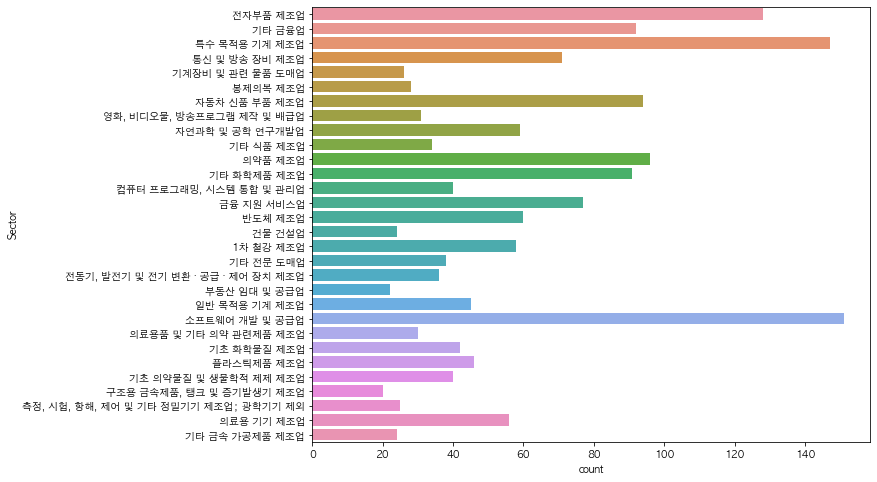

In [86]:
plt.figure(figsize=(10,8))
sns.countplot(data=sector_30, y="Sector")

<AxesSubplot:xlabel='count', ylabel='Sector'>

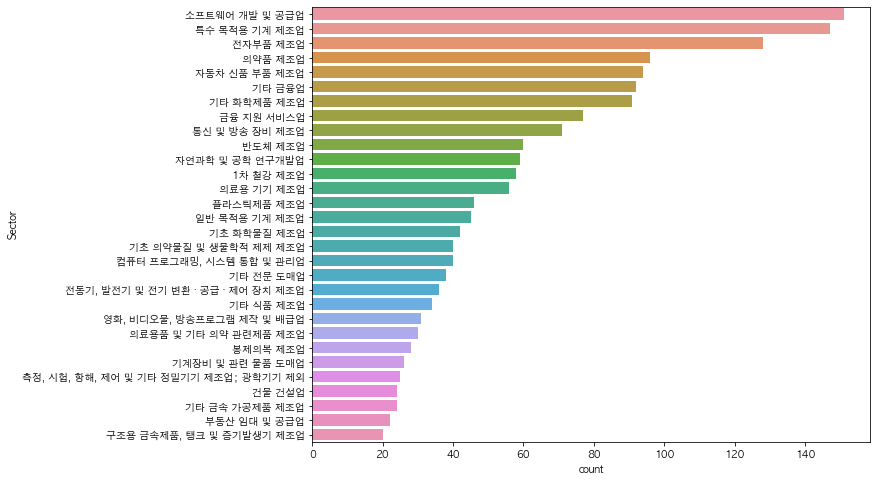

In [87]:
# 빈도수 순으로
plt.figure(figsize=(10,8))
sns.countplot(data=sector_30, y="Sector", order=sector_count_top.index)

## Industry

In [90]:
# Industry의 빈도수
industry_count_top = df["Industry"].value_counts().head(30)

In [91]:
industry_count_top.index

Index(['기업인수합병', '지주회사', '지주사업', '모바일게임', '화장품', '기업인수 및 합병', '금융 지원 서비스',
       '기업 인수 및 합병', '-', '부동산투자', '셋톱박스', '자동차부품', '벤처캐피탈', '의약품', '합병',
       '증권업', '금융 지원 서비스업', '도급공사', '건강기능식품', '금융지주회사', '기업인수', '금융지원 서비스',
       '유가증권 매매,중개,대리,인수', '화장품 용기', '반도체용 인쇄회로기판', '부동산 임대업', '부동산 투자 및 관리',
       '주정', '전력변환장치', '카지노'],
      dtype='object')

In [92]:
industry_30 = df[df["Industry"].isin(industry_count_top.index)]

<AxesSubplot:xlabel='count', ylabel='Industry'>

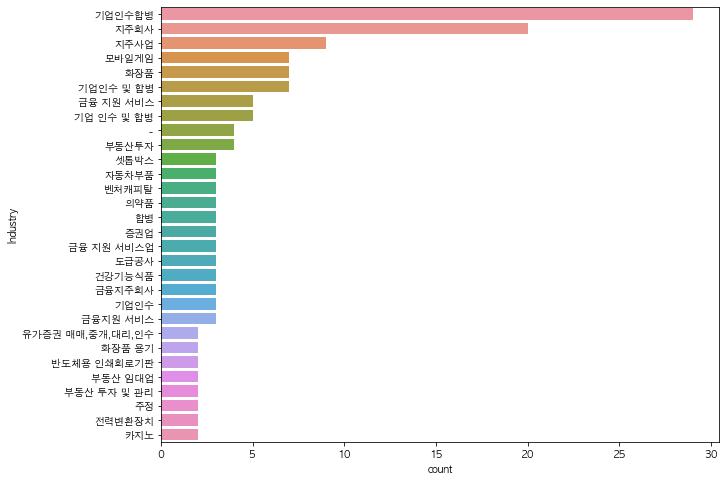

In [94]:
plt.figure(figsize=(10,8))
sns.countplot(data=industry_30, y="Industry", order=industry_count_top.index)

<AxesSubplot:>

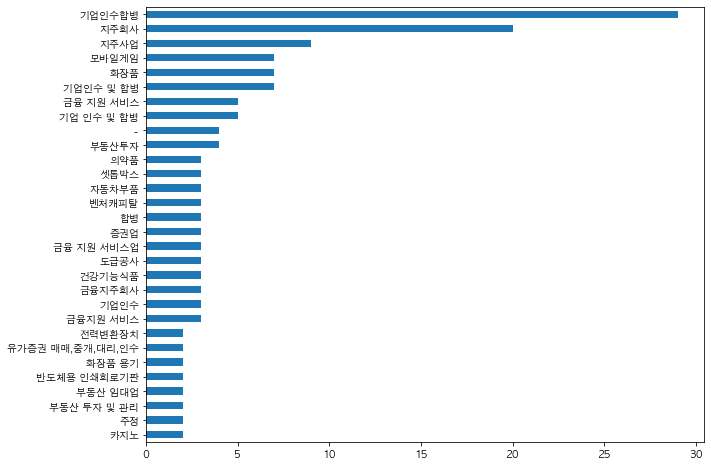

In [97]:
industry_count_top.sort_values().plot.barh(figsize=(10,8))

## Region

In [75]:
# Industry의 빈도수
df["Region"].value_counts()

서울특별시      1022
경기도         706
충청남도         98
경상남도         90
인천광역시        87
충청북도         86
부산광역시        76
경상북도         64
대구광역시        53
대전광역시        52
전라북도         29
울산광역시        26
강원도          26
전라남도         22
광주광역시        22
세종특별자치시      10
제주특별자치도       8
홍콩            8
미국            6
케이맨 제도        5
일본            2
싱가포르          1
Name: Region, dtype: int64

<AxesSubplot:>

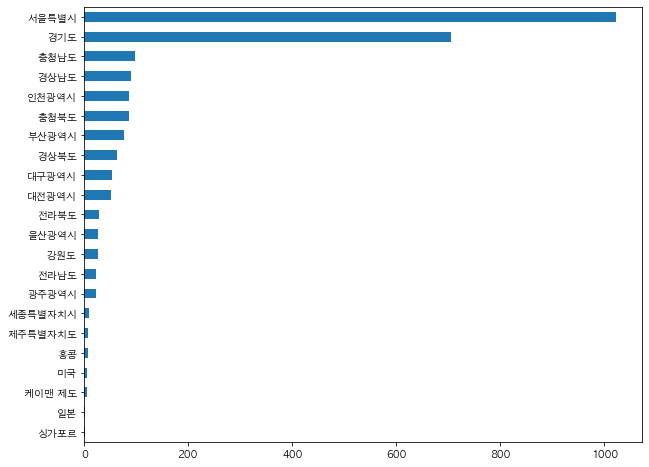

In [102]:
df["Region"].value_counts().sort_values().plot.barh(figsize=(10,8))

<AxesSubplot:xlabel='count', ylabel='Region'>

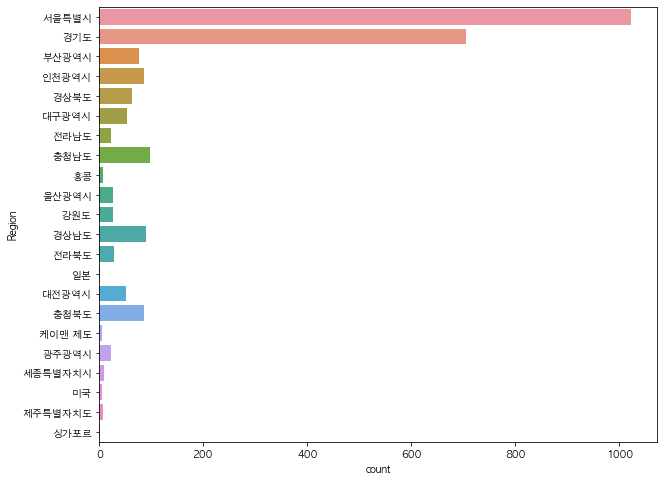

In [103]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, y="Region")

<AxesSubplot:xlabel='count', ylabel='Region'>

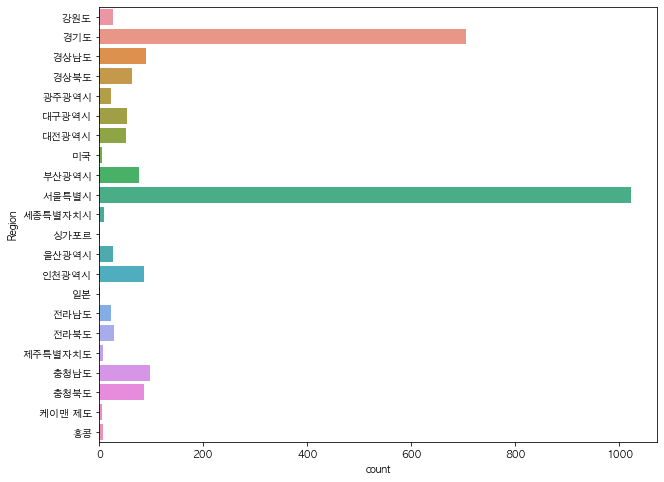

In [104]:
# REgion 을 기준으로 정렬하기
plt.figure(figsize=(10,8))
sns.countplot(data=df.sort_values("Region"), y="Region")

# 두 개의 변수 빈도수 구하고 시각화 하기
* corsstab 으로 빈도수 구하기

## 지역별 상장 시장 종목 빈도수 구하기
* pd.crosstab을 통한 2개의 변수에 대한 빈도수 구하기

In [105]:
# pd.crosstab을 통한 2개의 변수에 대한 빈도수 구하기
# Market과 Region 으로 빈도수 구하기
pd.crosstab(df["Market"], df["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,5,32,1,4,4,1,7,0,2,47,...,0,3,0,3,1,1,4,9,0,0
KOSDAQ,17,527,47,41,9,31,38,6,39,550,...,9,60,2,12,16,2,69,61,4,8
KOSPI,4,147,42,19,9,21,7,0,35,425,...,17,24,0,7,12,5,25,16,1,0


Text(0.5, 1.0, '마켓별 지역별 빈도수')

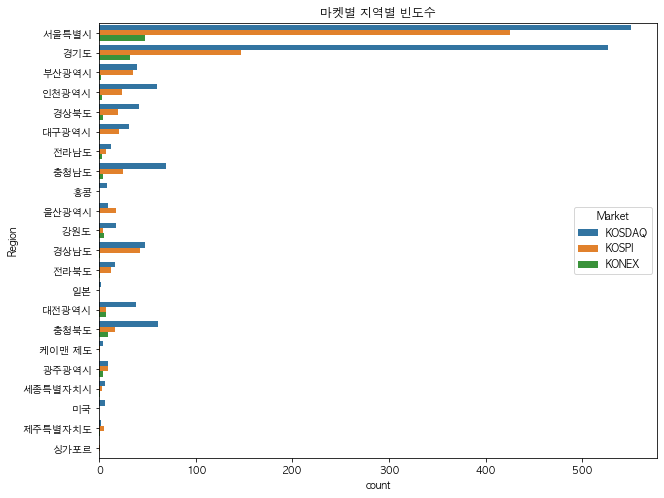

In [113]:
# countplot으로 시각화하기
plt.figure(figsize=(10,8))
#plt.xticks(rotation=90)
sns.countplot(data=df, y="Region", hue="Market").set_title("마켓별 지역별 빈도수")

## 연도별 상장 종목 빈도수 분석

In [120]:
# Market, ListingYear 빈도수 구하기
market_year = pd.crosstab(df["Market"], df["ListingYear"])
market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,24,21,14,13,13,11,7,1
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,89,60,68,85,89,86,100,35
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,2


## seaborn 이용한 빈도수 시각화

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

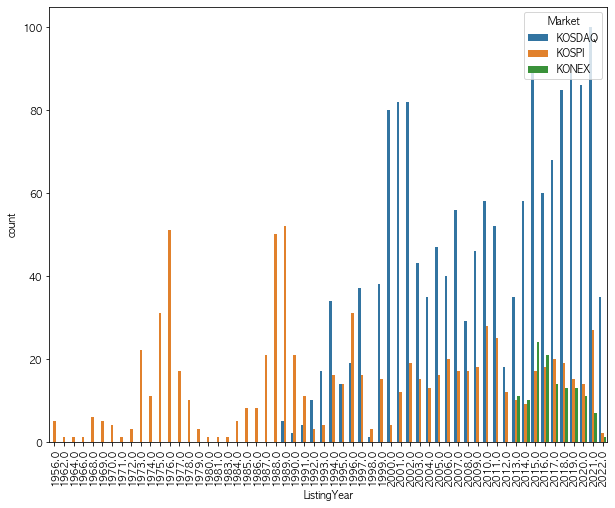

In [118]:
# seaborn countplot 활용하여 빈도수 표현하기
# hue 이용해 다른 변수 함께 표현하기(hue=색상)
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.countplot(data=df, x="ListingYear", hue="Market")

<AxesSubplot:title={'center':'연도별 상장 종목 수'}, xlabel='ListingYear'>

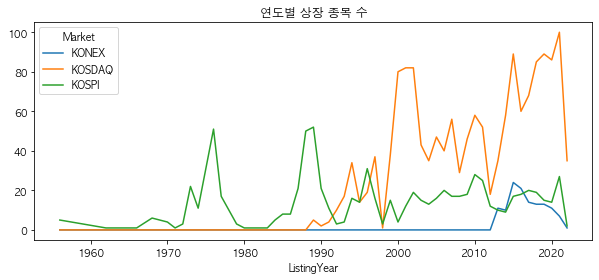

In [125]:
## pandas 이용한 빈도수 시각화 
market_year.T.plot(figsize=(10,4), title="연도별 상장 종목 수")

array([<AxesSubplot:xlabel='ListingYear'>,
       <AxesSubplot:xlabel='ListingYear'>,
       <AxesSubplot:xlabel='ListingYear'>], dtype=object)

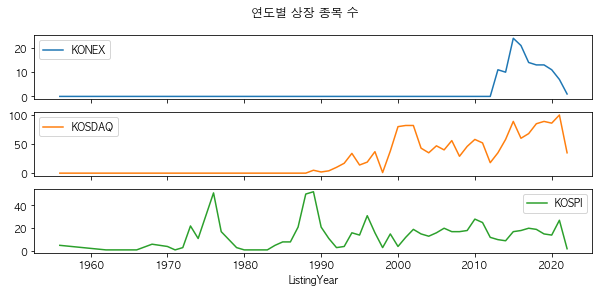

In [127]:
market_year.T.plot(figsize=(10,4), title="연도별 상장 종목 수", subplots=True)

<AxesSubplot:title={'center':'마켓 연도별 상장 종목 수'}, xlabel='ListingYear'>

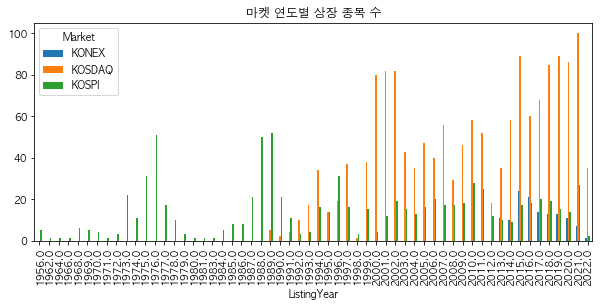

In [132]:
market_year.T.plot.bar(figsize=(10,4), title="마켓 연도별 상장 종목 수")

In [137]:
market_year.columns = market_year.columns.astype(int)
market_year

ListingYear,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,24,21,14,13,13,11,7,1
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,89,60,68,85,89,86,100,35
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,2


<AxesSubplot:xlabel='ListingYear'>

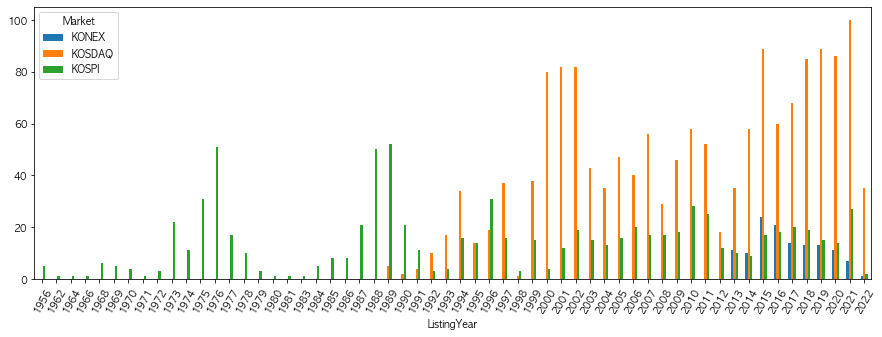

In [142]:
market_year.T.plot.bar(figsize=(15,5),rot=60)

## groupby와 pivot_table 로 빈도수 구하기

In [159]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
market_year = df.groupby(["Market","ListingYear"])["Symbol"].count()
market_year.unstack().fillna(0).astype(int)

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,24,21,14,13,13,11,7,1
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,89,60,68,85,89,86,100,35
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,2


In [156]:
# pivot_table로 같은 결과 나오게 연산하기
pd.pivot_table(data=df, index="Market",columns="ListingYear", values="Symbol", aggfunc="count", fill_value=0)

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,24,21,14,13,13,11,7,1
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,89,60,68,85,89,86,100,35
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,2


In [169]:
df_market_year

,Market,ListingYear,count
0,KONEX,2013.0,11
1,KONEX,2014.0,10
2,KONEX,2015.0,24
3,KONEX,2016.0,21
4,KONEX,2017.0,14
...,...,...,...
97,KOSPI,2018.0,19
98,KOSPI,2019.0,15
99,KOSPI,2020.0,14
100,KOSPI,2021.0,27


<AxesSubplot:xlabel='ListingYear', ylabel='count'>

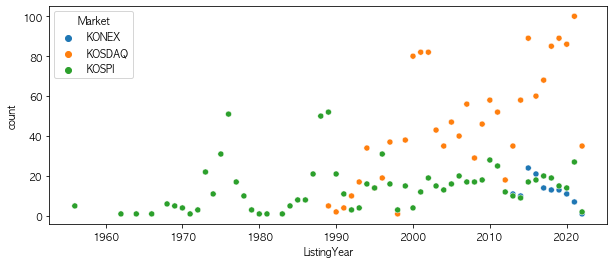

In [172]:
# 위의 groupby 결과를 scatterplot으로 그리기
df_market_year = market_year.reset_index()
df_market_year = df_market_year.rename(columns={"Symbol":"count"})
df_market_year
plt.figure(figsize=(10,4))
sns.scatterplot(data=df_market_year, x="ListingYear", y="count", hue="Market")

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

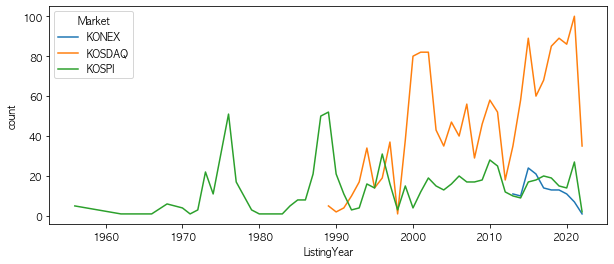

In [175]:
# lineplot 그리기
plt.figure(figsize=(10,4))
sns.lineplot(data=df_market_year, x="ListingYear", y="count", hue="Market")

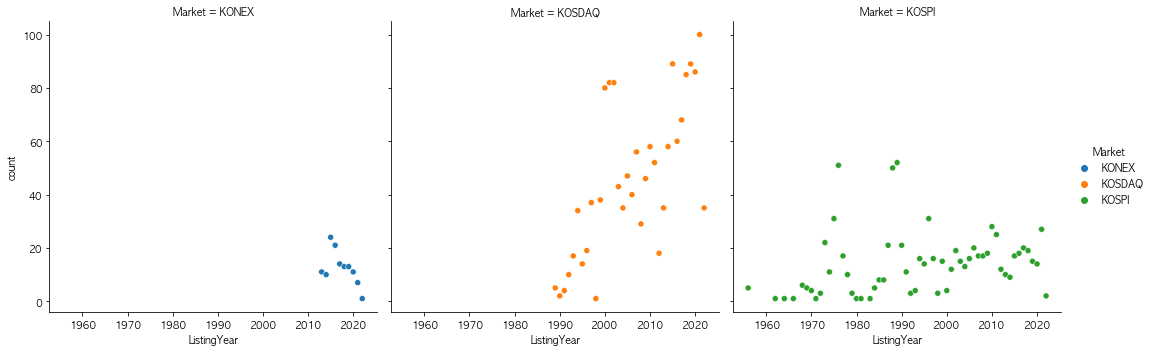

In [179]:
# relplot으로 subplot 그리기 - scatter
sns.relplot(data=df_market_year, x="ListingYear", y="count", hue="Market", col="Market")

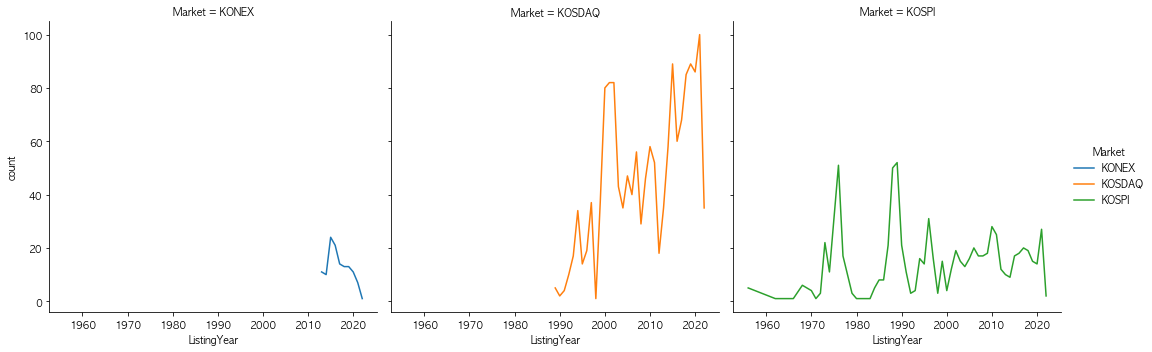

In [180]:
# relplot으로 subplot 그리기 - line
sns.relplot(data=df_market_year, x="ListingYear", y="count", hue="Market", col="Market", kind="line")

## 구간화 binning 과 히스토그램

<AxesSubplot:ylabel='Frequency'>

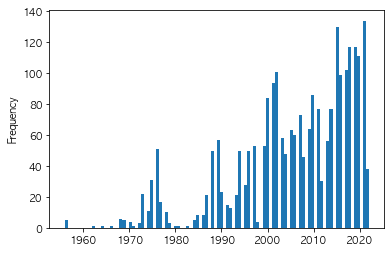

In [184]:
# bins의 갯수에 따라 그래프의 표현 방법이 달라짐
df["ListingYear"].plot.hist(bins=100)

<AxesSubplot:ylabel='Density'>

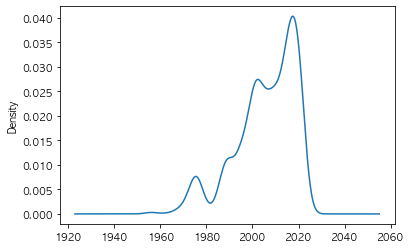

In [185]:
df["ListingYear"].plot.kde()

# 데이터 색인

In [190]:
# 케이맨 제도에 있는 회사 찾기
df[df["Region"] == "케이맨 제도"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
2274,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도,2016.0
2310,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도,2009.0
5106,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도,2010.0
5370,900140,KOSPI,엘브이엠씨홀딩스,자동차 판매업,지주회사,2010-11-30,12월,"오세영, 노성석, 김선발 (각자 대표이사)",http://www.lvmcholdings.net,케이맨 제도,2010.0
6015,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도,2016.0


In [192]:
# 1970년 이전에 상장한 기업 찾기
df[df["ListingYear"] < 1970]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
65,000120,KOSPI,CJ대한통운,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,"강신호,민영학(각자대표)",http://www.cjlogistics.com,서울특별시,1956.0
87,001530,KOSPI,DI동일,상품 중개업,"면사,화섬사,면포,혼방포,스포츠웨어용 신합섬 제조,도매,수출",1964-01-04,12월,"서태원, 손재선",http://www.dong-il.com,서울특별시,1964.0
1919,004250,KOSPI,NPC,플라스틱제품 제조업,"산업용기프라스틱제품(플라스틱 파렛트,시트 파렛트) 제조,판매",1969-09-08,12월,최병민,http://www.npc.co.kr,경기도,1969.0
2256,000050,KOSPI,경방,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시,1956.0
2534,001440,KOSPI,대한전선,절연선 및 케이블 제조업,"전력선,통신케이블,적산계기,스텐레스압연제품,광케이블,초고압선,알루미늄 제조,도매/전기공사",1968-12-27,12월,나형균,http://www.taihan.com,경기도,1968.0
2536,001790,KOSPI,대한제당,"곡물가공품, 전분 및 전분제품 제조업","제당,가축용 배합사료,설탕,기능성감미료(자일로올리고당),외식산 제조,도소매/부동산 임대",1968-12-27,12월,강승우,http://www.ts.co.kr,인천광역시,1968.0
2539,003490,KOSPI,대한항공,항공 여객 운송업,"여객운송,화물운송,항공기 제조,판매,정비수리/기내식 제조판매,면세품 판매",1966-03-18,12월,"조원태, 우기홍",http://www.koreanair.com,서울특별시,1966.0
2833,000060,KOSPI,메리츠화재,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시,1956.0
4427,000070,KOSPI,삼양홀딩스,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,"엄태웅, 이영준",http://www.samyang.com,서울특별시,1968.0
4524,002420,KOSPI,세기상사,연료 소매업,"극장(영화상영)/극영화,만화영화 제조/음식료품,일용잡화 소매/부동산 임대",1968-12-27,12월,조영준,http://daehancinema.com,서울특별시,1968.0


In [195]:
# 2020년 상장한 서울특별시에 소재한 코스피 종목 찾기
df[(df["ListingYear"]==2020) & (df["Region"]=="서울특별시") &(df["Market"]=="KOSPI")]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
103,365550,KOSPI,ESR켄달스퀘어리츠,부동산 임대 및 공급업,부동산투자,2020-12-23,05월,박래익,http://www.esrks-reit.com,서울특별시,2020.0
1576,344820,KOSPI,KCC글라스,유리 및 유리제품 제조업,판유리 등,2020-01-21,12월,김내환,http://www.kccglass.co.kr,서울특별시,2020.0
4205,357250,KOSPI,미래에셋맵스리츠,부동산 임대 및 공급업,부동산 임대업,2020-08-05,11월,정상구,http://www.maps1reit.miraeasset.com,서울특별시,2020.0
5318,244920,KOSPI,에이플러스에셋,보험 및 연금관련 서비스업,보험대리 및 중개업,2020-11-20,12월,"곽근호, 서성식, 조규남",NaN,서울특별시,2020.0
5661,350520,KOSPI,이지스레지던스리츠,부동산 임대 및 공급업,"부동산투자, 취득, 매매, 임대",2020-08-05,06월,박영희,http://igisresidencereit.com/,서울특별시,2020.0
5666,334890,KOSPI,이지스밸류리츠,부동산 임대 및 공급업,"부동산투자, 취득, 매매, 임대",2020-07-16,08월,도병운,http://www.igisvaluereit.com,서울특별시,2020.0
5767,348950,KOSPI,제이알글로벌리츠,부동산 임대 및 공급업,벨기에 파이낸스 타워,2020-08-07,06월,오남수,http://jrglobalreit.com,서울특별시,2020.0
5936,357120,KOSPI,코람코에너지리츠,부동산 임대 및 공급업,부동산 투자 및 관리,2020-08-31,11월,이성균,http://www.koramcoenergyplus.co.kr,서울특별시,2020.0
6097,363280,KOSPI,티와이홀딩스,기타 금융업,지주사업,2020-09-22,12월,유종연,http://www.ty-holdings.co.kr,서울특별시,2020.0
6269,352820,KOSPI,하이브,오디오물 출판 및 원판 녹음업,"음악 기획/제작, 퍼블리싱, 아티스트 매니지먼트",2020-10-15,12월,박지원,http://hybecorp.com,서울특별시,2020.0


## 지역별 섹터

In [198]:
# Sector, Region 으로 crosstab 연산 하기
df_sr = pd.crosstab(df["Sector"], df["Region"])
df_sr

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,7,1,0,1,0,11,12,...,0,5,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,0,0,1,0,1,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0


## 컬럼과 인덱스 값으로 색인하기

In [201]:
# 특정 컬럼만 가져오기
df_sr[["경기도","서울특별시"]]

Region,경기도,서울특별시
Sector,,
1차 비철금속 제조업,7,3
1차 철강 제조업,4,12
가구 제조업,4,3
가전제품 및 정보통신장비 소매업,0,2
가정용 기기 제조업,6,1
...,...,...
해상 운송업,0,5
"해체, 선별 및 원료 재생업",1,0
화학섬유 제조업,0,6


## 특정 행만 가져오기
* .loc[행]
* .loc[행, 열]
* .loc[조건식, 열]

In [206]:
# df_sr에서 "소프트웨어 개발 및 공급업" 행만 가져오기
df_sr.loc["소프트웨어 개발 및 공급업"].sort_values(ascending=False)

Region
서울특별시      105
경기도         39
충청북도         2
홍콩           1
일본           1
경상남도         1
대전광역시        1
부산광역시        1
케이맨 제도       0
충청남도         0
제주특별자치도      0
전라북도         0
전라남도         0
강원도          0
인천광역시        0
울산광역시        0
세종특별자치시      0
미국           0
대구광역시        0
광주광역시        0
경상북도         0
싱가포르         0
Name: 소프트웨어 개발 및 공급업, dtype: int64

In [208]:
# loc로 행인덱스 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업" 가져오기
df_sr.loc[["소프트웨어 개발 및 공급업","금융 지원 서비스업", "의약품 제조업"]]

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
소프트웨어 개발 및 공급업,0,39,1,0,0,0,1,0,1,105,...,0,0,1,0,0,0,0,2,0,1
금융 지원 서비스업,0,1,0,0,0,0,0,0,0,76,...,0,0,0,0,0,0,0,0,0,0
의약품 제조업,5,36,1,0,0,0,2,0,1,39,...,0,2,0,0,0,0,2,6,0,0


In [209]:
# loc로 행, 컬럼 가져오기
# 행 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"
# 열 "서울특별시"
df_sr.loc[["소프트웨어 개발 및 공급업","금융 지원 서비스업", "의약품 제조업"],["서울특별시"]]

Region,서울특별시
Sector,
소프트웨어 개발 및 공급업,105
금융 지원 서비스업,76
의약품 제조업,39


<AxesSubplot:title={'center':'소프트웨어 개발 및 공급업 지역별 빈도수'}, ylabel='Region'>

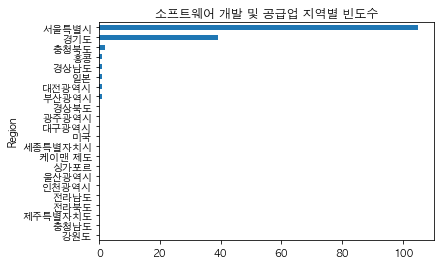

In [214]:
# "소프트웨어 개발 및 공급업" 만 가져와서 막대그래프 그리기
df_sr.loc["소프트웨어 개발 및 공급업"].sort_values().plot.barh(title="소프트웨어 개발 및 공급업 지역별 빈도수")

<AxesSubplot:title={'center':'의약품 제조업 지역별 빈도수'}, ylabel='Region'>

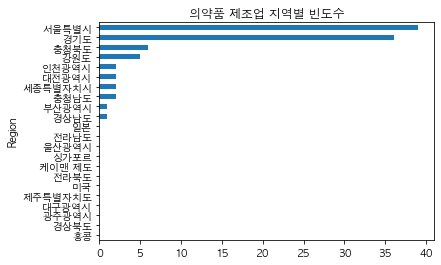

In [215]:
# "의약품 제조업" 만 가져와서 막대그래프 그리기
df_sr.loc["의약품 제조업"].sort_values().plot.barh(title="의약품 제조업 지역별 빈도수")

In [221]:
# iloc[행]
# iloc[행, 열]
df_sr.iloc[[0,1],[0,1]]
df_sr.iloc[:2,:2]

Region,강원도,경기도
Sector,,
1차 비철금속 제조업,0,7
1차 철강 제조업,0,4


In [ ]:
# df.head 혹은 tail 도 내부에서 iloc를 슬라이싱으로 사용하고 있음

In [222]:
df_sr.iloc[:, -10:].head()

Region,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,
1차 비철금속 제조업,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,5,0,1,1,0,4,0,0,0
가구 제조업,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,0,0,0,0,0,0,0,0,0


In [224]:
df_sr.head()

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,7,1,0,1,0,11,12,...,0,5,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
